<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#006400'> 
    
# 1. Intro </font>
</a>

Import Libraries, Data and define Cluster scenarios.
    
</div>
## `MetaData`
- __CustomerID__: A unique ID that identifies each customer

__`DEMOGRAPHICS:`__
- __Age__: Customer's current age in years
- __Under 30__: A flag indicating if customer is under 30 (1) or above (0)
- __Senior Citizen__: A flag indicating if customer is 65 or older (1) or not (0)
- __Gender_Male__: A flag indicating if customer is male (1) or female (0)
- __Dependents__: A flag indicating if customer has dependents (1) or not (0)
- __Number of Dependents__: Indicates number of dependents living with the customer
- __Married__: A flag indicating if customer is married (1) or not (0)

__`LOCATION & POPULATION DATA:`__ Country: US; State: California
- __City__: The city of the customer's primary residence
- __Zip Code__: 
- __Lat Long__: The combined latitude and longitude of the customer's primary residence
- __Latitude__: The latitude of the customer's primary residence
- __Longitude__: The longitude of the customer's primary residence
- __Population__: A current population estimate for the entire Zip Code area
- __Density_High__: A flag indicating if the area the customer lives has high population density 
- __Density_Low__: A flag indicating if the area the customer lives has low population density
- If both are zero, then density is medium

__`SERVICES:`__
- __Phone Service__: subscribes to home phone service (1) or not 
- __Internet Service__: subscribes to internet servie (1) or not 
- __Online Security__: subscribes to an additional online security service (1) or not 
- __Online Backup__: subscribes to an additional online backup service (1) or not 
- __Multiple Lines__: subscribes to multiple telephone lines with the company (1) or not 
- __Device Protection Plan__: subscribes to an additional device protection plan for their internet equipment (1) or not 
- __Premium Tech Support__: subscribes to an additional technical support plan with reduced wait times (1) or not 
- __Unlimited Data__: paid an additional monthly fee to have unlimited data downloads/uploads (1) or not 
- __Internet Type_Cable__: subscribes with internet cable (1) or not 
- __Internet Type_DSL__: subscribes with DSL (1) or not 
- __Internet Type_Fiber Optic__: subscribles with DSL (1) or not 

__`STREAMING:`__ No fee associated, is if uses the internet service to stream services from a third provider
- __Streaming TV__: uses streaming for TV programing
- __Streaming Movies__: uses streaming for movies
- __Streaming Music__: uses streaming for music

__`TENURE & CONTRACT:`__
- __Tenure in Months__: Total amount of months that the customer has been with the company
- __Tenure Category__: 0 if customer joined this quarter, 1 if joined > 3 - 18 m, 2 if joined > 18 - 36 m, 3 if joined > 36 - 54 m, 4 if joined  54 - 72 m
- __Contract__: -"month-to-month" is 1, "one year" is 2, "two year" is 3

__`PAYMENT PREFERENCES:`__
- __Paperless Billing__: has chosen paperless billing (1) or not (0)
- __Payment Method_Bank Withdrawal__: pays their bill with bank withdrawl (1) or not (0)
- __Payment Method_Credit Card__: pays their bill with credit card (1) or not (0)
- If both are zero then it pays with mailed check

__`REFERRALS AND OFFERS:`__
- __Referred a Friend__:
- __Number of Referrals__:
- __Offer_Offer A, Offer_Offer B, Offer_Offer C, Offer_Offer D, Offer_Offer E__: A flag indicating the last marketing offer the customer accepted (1) or not (0)

__`PROFITABILITY:`__
- __Total Revenue__: Total Charges + Extra Data Charges + Long Distance Charges - Refunds
- __Total Charges__: Customer's total charges at the end of the quarter
- __Total Refunds__: Customer's total refunds at the end of the quarter
- __Monthly Charge__: Customer's current total monthly charge for all their services from the company
- __Total Extra Data Charges__: Charges for extra data downloads above those specified in their plan
- __Total Long Distance Charges__: Charges for long distance above those specified in their plan
- __Avg Monthly Long Distance Charges__: Average long distance charges 

__`STATUS:`__
- __New Customer__: Is a new customer, i.e. joined this quarter (1) or not (0)
- __Churn Label__: 1 if the customer left the company this quarter or 0 if remained
- __Churn Score__: A value from 0-100 calculated using the predictive tool IBM SPSS Modeler, incorporating factors known to cause churn. The higher, the more likely the customer will churn
- __Churn Category_Attitude, Churn Category_Competitor, Churn Category_Dissatisfaction, Churn Category_Price__: Churn category's flag (1)
- __Churn Reason__: A customer's specific reason for leaving the company. Directly related to Churn Category but more descriptive
- __Satisfaction Score__: A customer's overall satisfaction rating of the company from 1 (very unsatisfied) to 5 (very satisfied)
- __Engagement Score__: Calculated score based on the number of services a customer has subscribed to. The more services, it adds up +1. Varies between 1 and 7
- __CLTV__: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.


<a id='toc'></a>

## <font color='darkseagreen'> Table of Contents </font>

>* [1. Data Collection](#import)<br>
>* [2. Data Exploration](#explore) <br>
>* [3. Data Pre-processing (before split)](#before_split) <br>
>* [4. Data Split](#split) <br>
>* [5. Feature Selection](#feature) <br>
>* [6. Feature Decision](#decision) <br>
>* [7. Modelling](#modelling) <br>

***
<div class="alert alert-block alert-success">
<a id='import'>
<font color = '#006400'> 
    
# 1. Data Collection </font>
</a>
    
</div>

Importing Libraries, Data Extraction and Merging datasets, as well as defining the training (historical data) and the test (predictive) sets.

## 1.1. Import libraries


In [84]:
import os
import glob
import pandas as pd 
import numpy as np 
import datetime
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
from math import ceil
from sklearn.preprocessing import MinMaxScaler 
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans
import scipy   
from scipy.cluster import hierarchy
from IPython.display import Markdown 
from sklearn.cluster import DBSCAN 
from sklearn.metrics import silhouette_samples, silhouette_score 
from pprint import pprint 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer
from scipy.stats import spearmanr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer

from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

############################################ FEATURE SELECTION ############################################
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.feature_selection import RFECV # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method
from sklearn.model_selection import StratifiedKFold

# ignoring warnings
warnings.filterwarnings('ignore')

# setting visual theme
sns.set_theme(style = 'white', palette = None)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV




### 1.2. Import data

In [85]:
df = pd.read_csv("df_preprocessed.csv")
df.set_index('Customer ID', inplace = True)

### 1.3. Check for duplicates
__`Duplicates`__ Drop any duplicate rows present in the dataframe with the method `drop_duplicates()`

In [86]:
df.shape

(7043, 59)

In [87]:
df.drop_duplicates(inplace = True)
df.shape

(7043, 59)

***
[BACK TO TOC](#toc)
    
<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#006400'> 
    
# 2. Data Exploration </font>
</a>
    
</div>

Understand the structure of the data and provide the first impressions of patterns, relations and errors.

### 2.1. Basic info and statistics

In [88]:
# Checking train data general info in a dataframe
def df_info(data): 
    '''
    Returns a dataframe of .info() method, instead of its usual design
    
    Args: 
        data (panda dataframe) - data to analyse
    Returns: 
        pandas dataframe'''
    
    tab_info = pd.DataFrame(data.dtypes).T.rename(index={0:'Column type'})
    tab_info = tab_info.append(pd.DataFrame(data.isna().sum()).T.rename(index={0:'Count for missing values'}))
    tab_info = tab_info.append(pd.DataFrame(data.isna().sum() / len(data)*100).T.
                             rename(index={0:'Missing values (in %)'}))
    tab_info = tab_info.T.join(data.describe().T).fillna('-')
    
    return tab_info

display(df_info(df).style)

# Checking train and test shapes
print(f'\n\n\033[1mTrain set has {df.shape[1]} features with data from {df.shape[0]} Clients.\n',
f'\nTest set has {df.shape[1]} features (doesn\'t have target) with data from {df.shape[0]} Clients.')

,Column type,Count for missing values,Missing values (in %),count,mean,std,min,25%,50%,75%,max
Age,float64,0,0.000000,7043.000000,0.450979,0.274596,0.000000,0.213115,0.442623,0.672131,1.000000
Under 30,int64,0,0.000000,7043.000000,0.198921,0.399217,0.000000,0.000000,0.000000,0.000000,1.000000
Senior Citizen,int64,0,0.000000,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
Married,int64,0,0.000000,7043.000000,0.483033,0.499748,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,int64,0,0.000000,7043.000000,0.231010,0.421508,0.000000,0.000000,0.000000,0.000000,1.000000
Number of Dependents,float64,0,0.000000,7043.000000,0.052077,0.106978,0.000000,0.000000,0.000000,0.000000,1.000000
City,object,0,0.000000,-,-,-,-,-,-,-,-
Referred a Friend,int64,0,0.000000,7043.000000,0.457476,0.498224,0.000000,0.000000,0.000000,1.000000,1.000000
Number of Referrals,float64,0,0.000000,7043.000000,0.177442,0.272836,0.000000,0.000000,0.000000,0.272727,1.000000
Tenure in Months,float64,0,0.000000,7043.000000,0.442067,0.345663,0.000000,0.112676,0.394366,0.760563,1.000000




Train set has 59 features with data from 7043 Clients.
 
Test set has 59 features (doesn't have target) with data from 7043 Clients.


__For qualitative features__:

In [89]:
df.describe(include='O').T

,count,unique,top,freq
City,7043,1106,Los Angeles,293
Churn Reason,1869,20,Competitor had better devices,313


### 2.2. Further exploration 

__Skewness and Kurtosis__

In [90]:
# Compute skewness and kurtosis on numeric variables only
num_cols = df.select_dtypes(include=np.number).columns
tab_info4 = pd.DataFrame(df[num_cols].skew(), columns=['Skewness'])
tab_info5 = pd.DataFrame(df[num_cols].kurtosis(), columns=['Kurtosis'])
tab_info2 = pd.concat([tab_info4,tab_info5])
tab_info2

,Skewness,Kurtosis
Age,0.162186,NaN
Under 30,1.508777,NaN
Senior Citizen,1.833633,NaN
Married,0.067922,NaN
Dependents,1.276686,NaN
...,...,...
Density_High,NaN,-1.540640
Density_Low,NaN,-1.479143
Contract_Month-to-Month,NaN,-1.998038
Contract_One Year,NaN,-0.173223


__Categorical Variables - Check levels/possible values__

In [91]:
# Check unique values
df['Churn Reason'].value_counts()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn Reason, 

[BACK TO TOC](#toc)

### 2.3. Visual Exploration

__Spearman correlation between numerical variables:__

***
[BACK TO TOC](#toc)

### 2.4. Outliers

**Outliers: IQR approach**
> * The IQR method states that values locating outside the interval **[Q1 - 1.5 * IQR, Q1 + 1.5 * IQR] are outliers**
> * Because the data is sensitive, only extreme values with IQR test will be considered for this test __by using a criterion of 3__
> * The 3(IQR) criterion tells us that any observation that falls outside the decision range is considered an extreme outlier 
> * Percentage of remaining data after outlier removal with IQR method when criterion is 3: 63.04 % of remaining data 


In [92]:
# How many outliers are there for each variable:

# Only NUMERICAL VALUES
# Calculate the interquartile range for each variable
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for each variable
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# The number of outliers in all variables
print((df < lower_bound).sum() + (df > upper_bound).sum())

Age                                     0
Avg Monthly GB Download               362
Avg Monthly Long Distance Charges       0
CLTV                                    0
Churn Category_Attitude               314
Churn Category_Competitor             841
Churn Category_Dissatisfaction        303
Churn Category_Price                  211
Churn Label                             0
Churn Reason                            0
Churn Score                             0
City                                    0
Contract_Month-to-Month                 0
Contract_One Year                    1550
Contract_Two Year                       0
Density_High                            0
Density_Low                             0
Dependents                           1627
Device Protection Plan                  0
Engagement Score                        0
Gender_Male                             0
Internet Service                     1526
Internet Type_Cable                   830
Internet Type_DSL                 

In [93]:
def check_IQR_outliers(data, criterion, mode='data'):
    '''
    Detects outliers by generating a decision range based on a criterion (threshold) 
    and locating values that don't fall within this range. 
    Can return the dataframe without the outliers or the percentage of remaining data
    after outlier removal or the values considered as outliers for each column by 
    changing the parameter 'mode' (data as default)
    
    Args: 
        data (pandas.core.frame.DataFrame) : set of data 
        col (pandas.core.series.Series) : column of the data to check outliers
        criterion (int) : IQR multiplier, the higher, the larger the decision range
        mode (str): 'data' to get dataframe without outliers 'perc' to check percentage
                     or 'values' to check values
        
    Returns:
        Dataframe without 
        Print with percentage of remaining data after removing outliers or
        index and values that fall outside the decision range (outliers)
    '''
    if mode == 'data': 
        Q1 = data.quantile(.25) # value of first quartile
        Q3 = data.quantile(.75) # value of third quartile
        IQR = Q3 - Q1 # interquartile range
        lower_lim = Q1 - criterion * IQR # setting min limit
        upper_lim = Q3 + criterion * IQR # setting max limit
        
        outliers = []
        for col in data.select_dtypes(np.number).columns:
            llim = lower_lim[col]
            ulim = upper_lim[col]
            outliers.append(data[col].between(llim, ulim, inclusive='both'))
            
        # np.all() tests whether all array elements along a given axis evaluate to True
        outliers = data[np.all(outliers, 0)]
        
        return outliers
        
    elif mode == 'perc':
        print('\n\033[1mPercentage of remaining data after outlier removal with IQR method:\033[0m\n')
        Q1 = data.quantile(.25) # value of first quartile
        Q3 = data.quantile(.75) # value of third quartile
        IQR = Q3 - Q1 # interquartile range
        lower_lim = Q1 - criterion * IQR # setting min limit
        upper_lim = Q3 + criterion * IQR # setting max limit
        
        outliers = []
        for col in data.select_dtypes(np.number).columns:
            #outliers.append(data[col].between(lower_lim[col], upper_lim[col], inclusive='both'))
            llim = lower_lim[col]
            ulim = upper_lim[col]
            outliers.append(data[col].between(llim, ulim, inclusive='both'))
            
        # np.all() tests whether all array elements along a given axis evaluate to True
        outliers = data[np.all(outliers, axis=0)]
        
        print(f'\033[1m{round(len(outliers)/len(data)*100,3)} %\033[0m of remaining data', 
              'after IQR method outlier removal, when criterion is', criterion)
    
    else:
        print('\n\n\033[1mOutlier Values:\033[0m\n')
        for col in data.select_dtypes(np.number).columns:
            Q1 = data[col].quantile(.25) # value of first quartile
            Q3 = data[col].quantile(.75) # value of third quartile
            IQR = Q3 - Q1 # interquartile range
            lower_lim = Q1 - criterion * IQR # setting min limit
            upper_lim = Q3 + criterion * IQR # setting max limit
            outliers = data.loc[(data[col] > upper_lim) | (data[col] < lower_lim)][col]
            print(f'Outlier values in \033[1m{col}\033[0m:\n')
            for idx, val in outliers.items():
                print(f'Value from Client {idx}: \033[1m', round(val,2),'\033[0m\n')

# checking outlier values
check_IQR_outliers(data=df, criterion=3, mode='value')


# checking percentage of remaining data
check_IQR_outliers(data=df, criterion=3, mode='perc')



Outlier Values:

Outlier values in Age:

Outlier values in Under 30:

Value from Client 9237-HQITU:  1 

Value from Client 7892-POOKP:  1 

Value from Client 4190-MFLUW:  1 

Value from Client 1066-JKSGK:  1 

Value from Client 8665-UTDHZ:  1 

Value from Client 8773-HHUOZ:  1 

Value from Client 3192-NQECA:  1 

Value from Client 0404-SWRVG:  1 

Value from Client 6207-WIOLX:  1 

Value from Client 0867-MKZVY:  1 

Value from Client 1875-QIVME:  1 

Value from Client 0691-JVSYA:  1 

Value from Client 1024-GUALD:  1 

Value from Client 7841-TZDMQ:  1 

Value from Client 2232-DMLXU:  1 

Value from Client 1251-KRREG:  1 

Value from Client 4484-GLZOU:  1 

Value from Client 6390-DSAZX:  1 

Value from Client 0122-OAHPZ:  1 

Value from Client 6680-NENYN:  1 

Value from Client 0219-YTZUE:  1 

Value from Client 0259-GBZSH:  1 

Value from Client 6905-NIQIN:  1 

Value from Client 0578-SKVMF:  1 

Value from Client 9063-ZGTUY:  1 

Value from Client 7752-XUSCI:  1 

Value from Client 

**Outliers: Conclusion**

Percentages of Data kept after outlier removal for each test: <p>
> * __IQR:__ 3.379 % when criterion is 3

Not Removing any outliers for now

[BACK TO TOC](#toc)
    
<div class="alert alert-block alert-success">
<a id='before_split'>
<font color = '#006400'> 
    
# 3. Data Pre Processing (before Split) </font>
</a>
    
</div>

**Drop Categorical Variables**
> 1 - __Churn Reason__ - Does not have predictive power<p>
> 2 - __City__ - Does not have predictive power<p>


In [94]:
df.drop('City', axis = 1, inplace = True)
df.drop('Churn Reason', axis = 1, inplace = True)
df.drop('Churn Category_Attitude', axis = 1, inplace = True)
df.drop('Churn Category_Competitor', axis = 1, inplace = True)
df.drop('Churn Category_Dissatisfaction', axis = 1, inplace = True)
df.drop('Churn Category_Price', axis = 1, inplace = True)
df.drop('New Customer', axis = 1, inplace = True)

[BACK TO TOC](#toc)
    
<div class="alert alert-block alert-success">
<a id='split'>
<font color = '#006400'> 
    
# 4. Data Split </font>
</a>
    
</div>

__Data is divided into two or more subsets.__ When working with test data, which represents unseen data to the models, it is important to follow certain guidelines to avoid data leakage and ensure reliable model performance:<br>
* __`Data Imputation:`__ Techniques like mean, median, mode, z-score standardization, and other imputation methods should be applied after the train-test split. This ensures that any imputation is performed only on the training data and does not incorporate information from the test set. Data leakage occurs when the training data contains information about the target variable that would not be available during real-world predictions, leading to overestimated performance.
* __`Train-Test Split:`__ The dataset should be split into a training set and a holdout test set. In this case, __80% of the data will be used for training models, while the remaining 20% will be set aside for validation.__ The data should be randomly shuffled before the split to avoid any bias. This __randomization__ ensures that the order of the samples does not impact the split. Additionally, __stratification__ should be applied to maintain the same proportion of classes in both the training and test sets as in the original dataset. This ensures that the model is trained and evaluated on representative data.

Given the size of the Dataset we are going to use __`K-Fold Cross-Validation`__ to split our data.
Create a new instance of StratifiedKFold named as `skf`, with the following hyperparameters:
> - n_splits = 5
> - random_state = 99
> - shuffle = True


**K-Fold Cross-Validation:** 

In [95]:
skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)

X = df.drop('Churn Label', axis = 1)
y = df['Churn Label'].copy()

***
***
[BACK TO TOC](#toc)


### 5.3 Feature Selection


## Filter Methods
Rank features or feature subsets independently of the predictor (classifier)<p>

Filter methods are generally used as preprocessing steps, and their selection is independent of any machine learning algorithm. Features are instead selected based on their scores in various statistical tests to determine their correlation with the outcome variable, which is subjective. Since it's a classification problem it'll be applied the following filter methods:

> * __Chi-Square__ - `For categorical data`. The 𝜒2 test is used in statistics to test the independence of two events. More specifically in feature selection it's used to test whether the occurrence of a specific term and the occurrence of a specific class are independent.<p>
> * __Kendall's Correlation Coeffificnet__ - Correlation is a measure of the linear relationship of 2 or more variables. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves. It'll be used the Kendall's Coefficient since it's a non-parametric test that it'll be applied to numerical input values and categorical output, the threshold will be +/- 0.50<p>
> * __ANOVA__ - `For one variable being numeric and one categorical` - Such as numerical input variables and a classification target variable in a classification task. <p>
> * __Variance__ - `For continous, ordinal and binary data`. Use variance to understand if our numerical data and ordinal data is constant or quasi-constant. <p>



In [96]:
def filter_fs_df(X, y, skf):
    '''
    Returns a dataframe with the Kendall's Correlation, ANOVA and Chi-Square applied to the input data
    
    Args:
        X (pandas.dataframe) - Variables
        y (pandas.dataframe) - Target
        skf (object) - StratifiedKFold instance

    Returns: 
        pandas.dataframe
    '''
    df = pd.DataFrame()
    df['Features'] = X.columns

    kendall_feat_count = {}  # Dictionary to store counts for Kendall's Correlation
    anova_feat_count = {}  # Dictionary to store counts for ANOVA
    chi_feat_count = {}  # Dictionary to store counts for Chi-Square
    
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Select numerical and categorical features
        X_train_num = X_train.select_dtypes(include=[np.number])
        X_train_cat = X_train.select_dtypes(include=['object', 'category'])

        # Apply Kendall's correlation for numerical features
        for col in X_train_num:
            if abs(stats.kendalltau(X_train_num[col], y_train)[0]) > .5:
                if col in kendall_feat_count:
                    kendall_feat_count[col] += 1
                else:
                    kendall_feat_count[col] = 1
        
        # Apply ANOVA for numerical features
        for col in X_train_num:
            fvalue, pvalue = f_classif(X_train_num[[col]], y_train)
            if pvalue[0] < 0.05:
                if col in anova_feat_count:
                    anova_feat_count[col] += 1
                else:
                    anova_feat_count[col] = 1

        # Apply Chi-Square for categorical features
        for col in X_train_cat:
            chi_check = pd.crosstab(y_train, X_train_cat[col]) 
            chi2, p, dof, expected = chi2_contingency(chi_check.values)
            if p < .05:
                if col in chi_feat_count:
                    chi_feat_count[col] += 1
                else:
                    chi_feat_count[col] = 1

    df['Kendall_Significant_Count'] = df['Features'].apply(lambda x: kendall_feat_count[x] if x in kendall_feat_count else 0)
    df['Filter_Kendall'] = df['Kendall_Significant_Count'].apply(lambda x: 'Keep' if x > 3 else 'Discard')
    df.loc[df['Features'].apply(lambda x: X[x].dtypes not in [np.number, np.float64, np.int64]), 'Filter_Kendall'] = '-'
    
    df['ANOVA_Significant_Count'] = df['Features'].apply(lambda x: anova_feat_count[x] if x in anova_feat_count else 0)
    df['Filter_ANOVA'] = df['ANOVA_Significant_Count'].apply(lambda x: 'Keep' if x > 3 else 'Discard')
    df.loc[df['Features'].apply(lambda x: X[x].dtypes not in [np.number, np.float64, np.int64]), 'Filter_ANOVA'] = '-'
    
    df['CHI2_Significant_Count'] = df['Features'].apply(lambda x: chi_feat_count[x] if x in chi_feat_count else 0)
    df['Filter_CHI2'] = df['CHI2_Significant_Count'].apply(lambda x: 'Keep' if x > 3 else 'Discard')
    df.loc[df['Features'].apply(lambda x: X[x].dtypes in [np.number, np.float64, np.int64]), 'Filter_CHI2'] = '-'
    
    return df

# Prepare StratifiedKFold instance
skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)

filtered = filter_fs_df(X, y, skf)
filtered.style

,Features,Kendall_Significant_Count,Filter_Kendall,ANOVA_Significant_Count,Filter_ANOVA,CHI2_Significant_Count,Filter_CHI2
0,Age,0,Discard,5,Keep,0,-
1,Under 30,0,Discard,5,Keep,0,-
2,Senior Citizen,0,Discard,5,Keep,0,-
3,Married,0,Discard,5,Keep,0,-
4,Dependents,0,Discard,5,Keep,0,-
5,Number of Dependents,0,Discard,5,Keep,0,-
6,Referred a Friend,0,Discard,5,Keep,0,-
7,Number of Referrals,0,Discard,5,Keep,0,-
8,Tenure in Months,0,Discard,5,Keep,0,-
9,Tenure Category,0,Discard,5,Keep,0,-


**Variance**

In [97]:
def select_features_variance(X, y, n_splits=5, random_state=99):
    skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    results = []

    for count, (train_index, val_index) in enumerate(skf.split(X, y), start=1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]

        var = X_train.var()
        results.append(var)

    result_df = pd.concat(results, axis=1)
    result_df.columns = [f'Variance (Split {i})' for i in range(1, n_splits+1)]
    
    return result_df

result_df = select_features_variance(X, y)
result_df

,Variance (Split 1),Variance (Split 2),Variance (Split 3),Variance (Split 4),Variance (Split 5)
Age,0.075345,0.074570,0.075027,0.075905,0.076170
Under 30,0.157691,0.159303,0.160688,0.159281,0.159922
Senior Citizen,0.136295,0.134371,0.133524,0.137588,0.137588
Married,0.249858,0.249717,0.249795,0.249646,0.249745
Dependents,0.179431,0.175607,0.180746,0.175972,0.176550
Number of Dependents,0.011632,0.011019,0.011798,0.011473,0.011296
Referred a Friend,0.248477,0.248168,0.248304,0.248068,0.248146
Number of Referrals,0.073366,0.073537,0.075481,0.074642,0.075176
Tenure in Months,0.119598,0.118874,0.119968,0.119459,0.119516
Tenure Category,0.120436,0.120354,0.121168,0.120713,0.121002


No Constant Variables

__Notes:__ 

> 1 - __Chi-Squared__ discards __Education__ and keeps __Marital_Status__ <p>
> 2 - __Kendall's correlation__ discards all features (meaning there're no variables with an absolute correlation with the target above 0.5)<p>
> 3 - __ANOVA test__, discards __Kid_Younger6__, __NumStorePurchases__, __NumAppVisitsMonth__, __Complain__, __CostContact__, __Revenue__ and __Age__ <p> 
> 4 - __Variance__ tells us that the variables __CostContact__ and __Revenue__ are constant features. We should remove those.<p>

***
Now it is time to understand the ones that we should keep and the ones to be removed.

Since we know that regressions are really sensible to correlated features, we should remove the correlated features before applying those techniques, namely Lasso Regression and Recursive Feature Elimination if the estimator used is a regression model. Therefore, we will begin by applying decision trees to identify which features among the correlated ones should be excluded.

### Decision Trees and Random Forest (Embedded Methods to use before applying regressions)

Use these two methods to first identify the most important variables and exclude redundant or correlated ones. These methods capture non-linear relationships and handle interactions between variables.


> * __Decision Trees__ - `For continous, ordinal and binary data` It is important to note that regression models are particularly sensible to correlated features. Therefore, we will begin by applying decision trees to identify which features among the correlated ones should be excluded.
> * __Random Forest__ - __Can be used to get the feature importances__, Random Forest improve the variance of simple Decision Trees by incorporating randomness. The criteria to get importance will be __Entropy which is a measure of information that indicates the disorder of the features with the target__. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy. <p>
    
Both methods are not affected by the scale of the features since they make splits based on thresholds and do not rely on the magniture of the values. We tested and results were not different when data was scaled or not.

**Decision Trees**

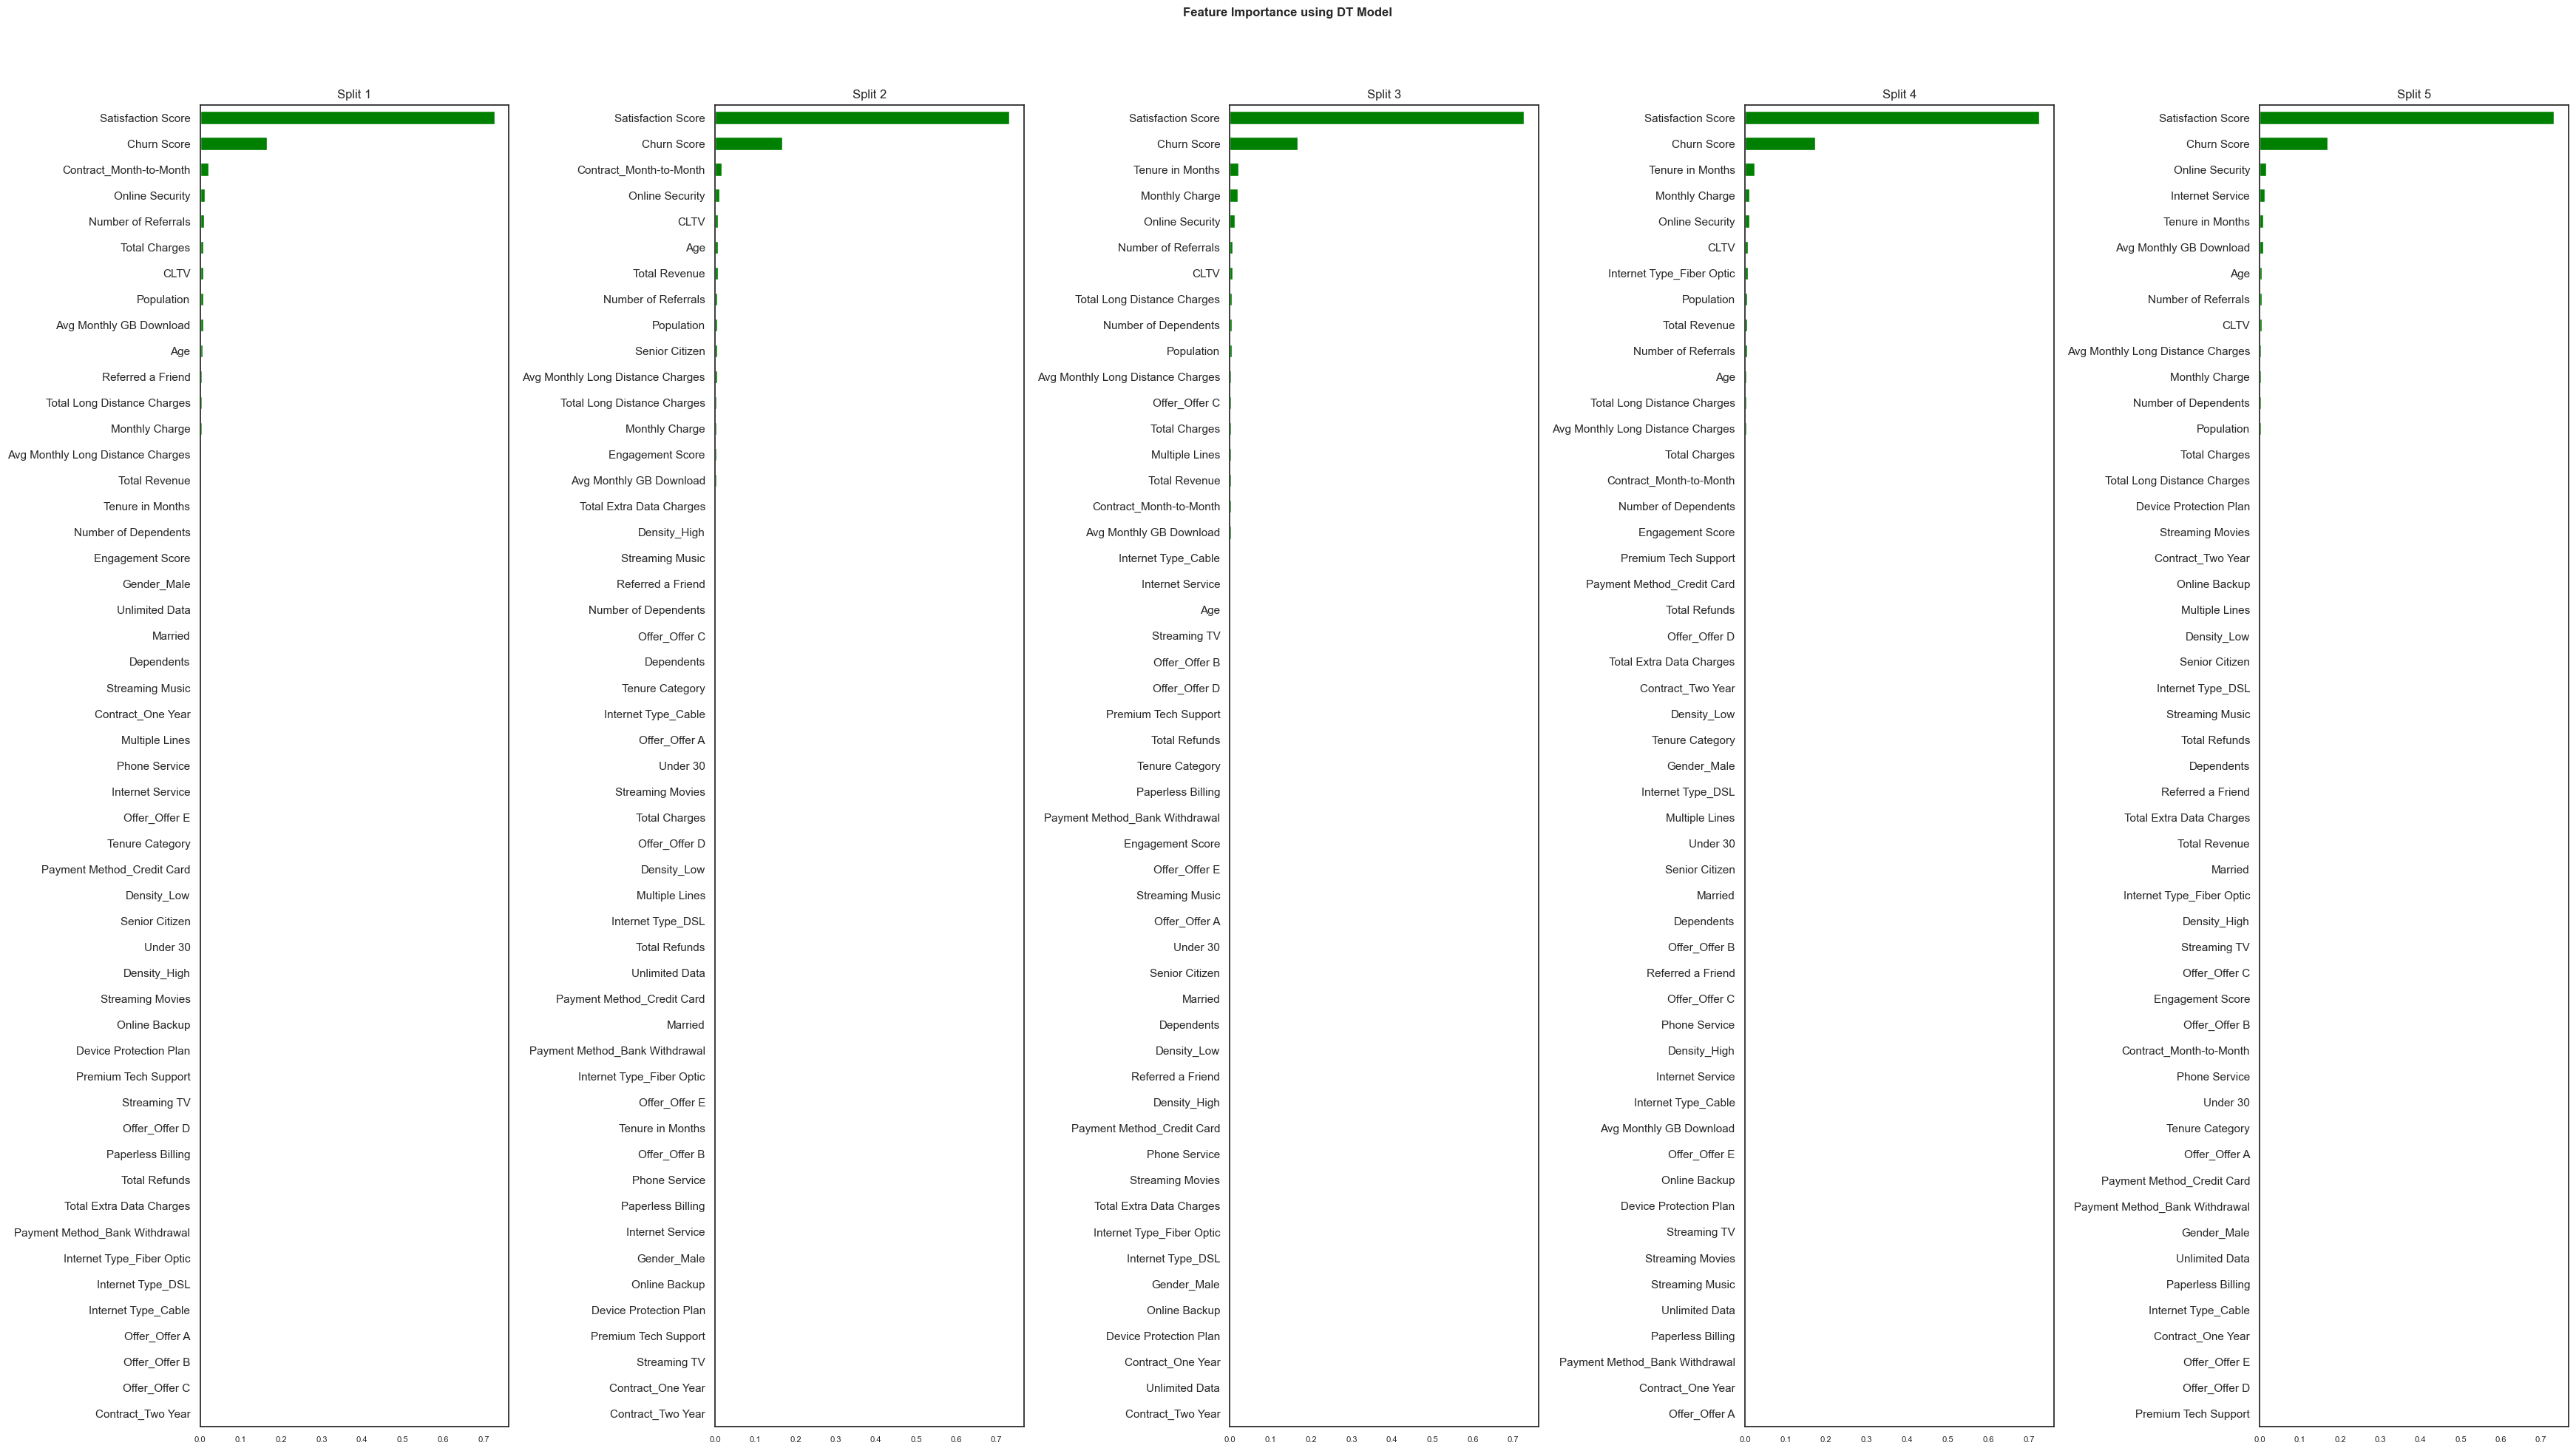

Satisfaction Score                   0.728265
Churn Score                          0.168258
Online Security                      0.012158
Tenure in Months                     0.011251
Monthly Charge                       0.008679
Contract_Month-to-Month              0.008029
CLTV                                 0.006975
Number of Referrals                  0.006213
Population                           0.005013
Age                                  0.004557
Avg Monthly GB Download              0.004025
Total Long Distance Charges          0.003929
Avg Monthly Long Distance Charges    0.003617
Total Revenue                        0.003391
Total Charges                        0.003097
Internet Service                     0.002602
Number of Dependents                 0.002522
Internet Type_Fiber Optic            0.001542
Engagement Score                     0.001470
Referred a Friend                    0.001415
Senior Citizen                       0.001288
Offer_Offer C                     

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer

def plot_importance(variables, name, subplot_index):
    imp_features = variables.sort_values()
    plt.subplot(1, 5, subplot_index)  # Adjust the subplot settings accordingly
    imp_features.plot(kind="barh", color='green')  # Set color to green
    plt.title("Split " + str(subplot_index))  # Set subplot title to split number
    plt.xticks(fontsize=8)  # Decrease the size of the x-axis labels
    plt.tight_layout()

def select_best_features_dt(X, y):
    count = 1
    fig = plt.figure(figsize=(35, 20))  # Create a figure to contain the subplots
    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    ranking_scores = pd.DataFrame(index=X.columns)  # Create a DataFrame to store the ranking scores

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        dt = DecisionTreeClassifier(random_state=99).fit(X_train, y_train)
        feature_importances = pd.Series(dt.feature_importances_, index=X_train.columns)

        # Store the feature importances in the ranking_scores DataFrame
        ranking_scores[f'Split {count}'] = feature_importances

        plot_importance(feature_importances, 'DT', count)
        count += 1

    plt.suptitle("Feature Importance using DT Model", fontsize=12, fontweight='bold')  # Overall title above the subplots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout of the subplots and overall title
    plt.show()

    # Calculate the average ranking score across all splits
    ranking_scores['Average Score'] = ranking_scores.mean(axis=1)
    average_ranking = ranking_scores['Average Score'].sort_values(ascending=False)
    print(average_ranking)

select_best_features_dt(X, y)


**Random Forest**

In [99]:
def plot_importance(variables, name, subplot_index):
    imp_features = variables.sort_values()
    plt.subplot(1, 5, subplot_index)  # Adjust the subplot settings accordingly
    imp_features.plot(kind="barh", color='green')  # Set color to green
    plt.title("Split " + str(subplot_index))  # Set subplot title to split number
    plt.xticks(fontsize=8)  # Decrease the size of the x-axis labels
    plt.tight_layout()

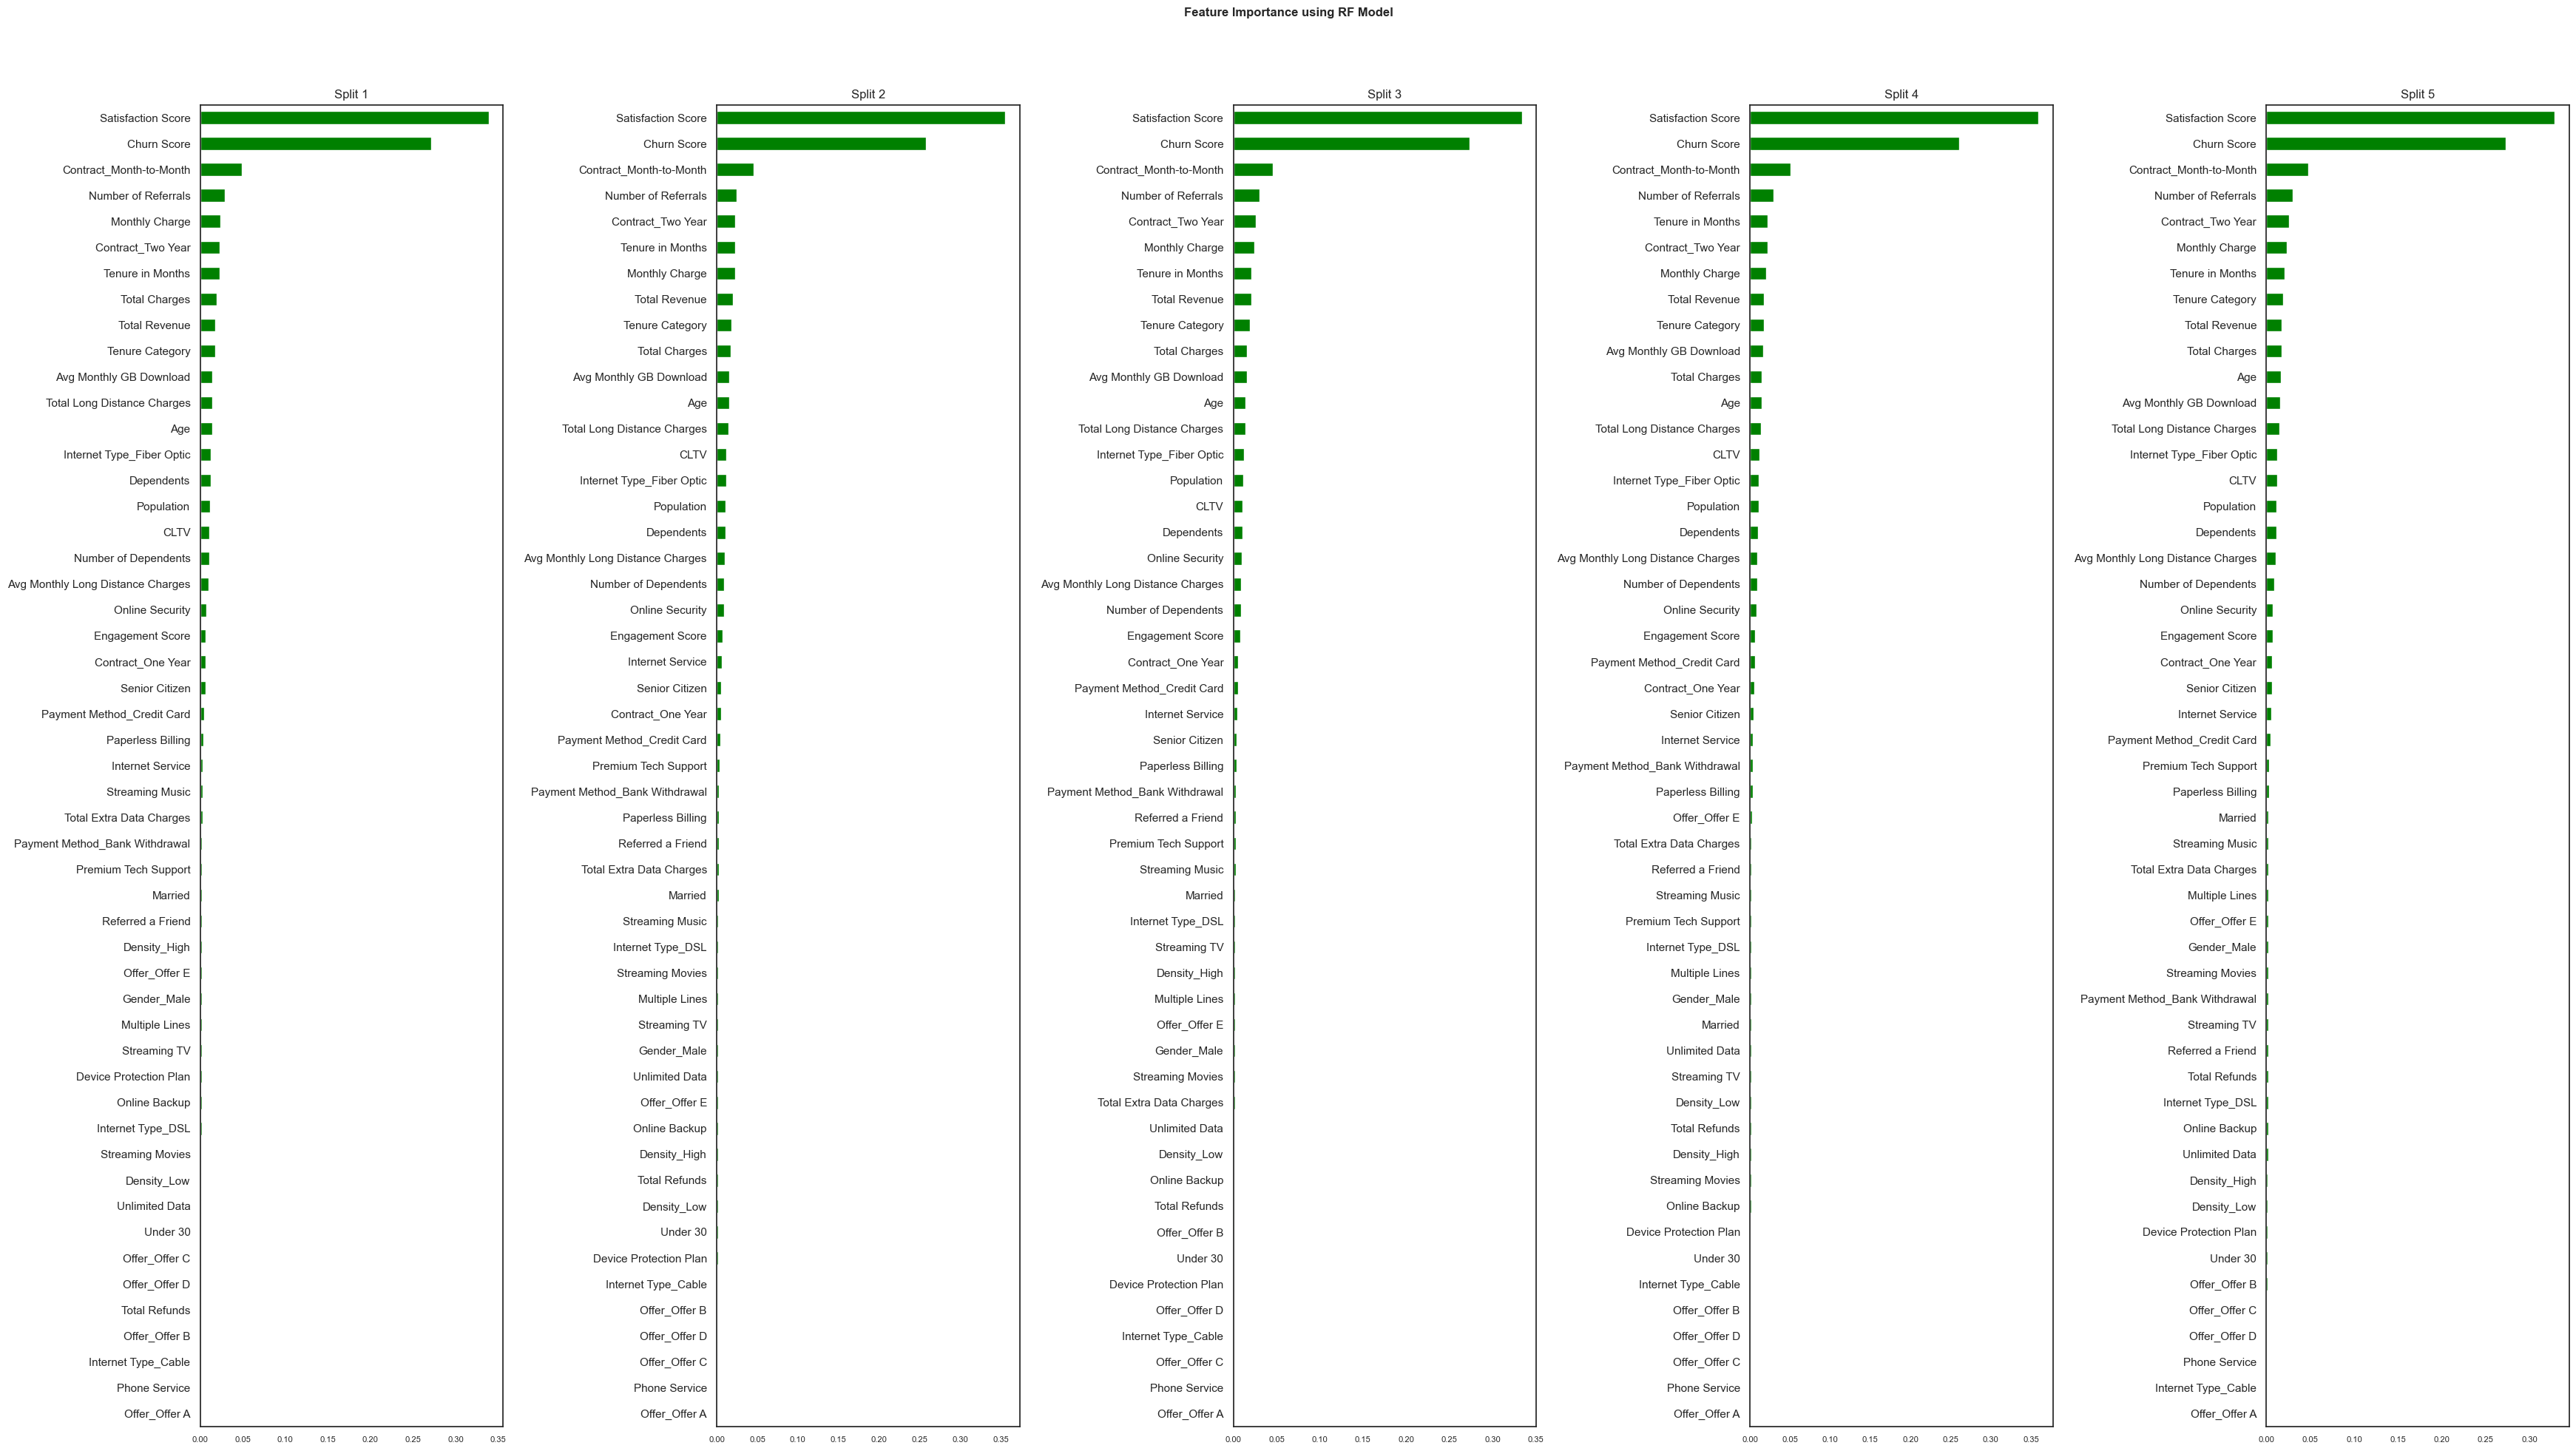

Satisfaction Score                   0.343422
Churn Score                          0.267384
Contract_Month-to-Month              0.047777
Number of Referrals                  0.028902
Contract_Two Year                    0.023959
Monthly Charge                       0.022605
Tenure in Months                     0.021807
Total Revenue                        0.018684
Tenure Category                      0.018094
Total Charges                        0.016850
Avg Monthly GB Download              0.015409
Age                                  0.014813
Total Long Distance Charges          0.013992
Internet Type_Fiber Optic            0.012030
CLTV                                 0.011420
Population                           0.011391
Dependents                           0.011092
Avg Monthly Long Distance Charges    0.009768
Number of Dependents                 0.009347
Online Security                      0.008351
Engagement Score                     0.006879
Contract_One Year                 

In [100]:
def apply_rf(X_train, y_train, subplot_index):
    rf = RandomForestClassifier(criterion='entropy', random_state=99).fit(X_train, y_train)
    feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    plot_importance(feature_importances, 'RF', subplot_index)
    return feature_importances

def select_best_features_rf(X, y):
    count = 1
    fig = plt.figure(figsize=(35, 20))  # Create a figure to contain the subplots
    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    ranking_scores = pd.DataFrame(index=X.columns)  # Create a DataFrame to store the ranking scores

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Select numerical features for random forest
        X_train_num = X_train.select_dtypes(include=[np.number])

        # Scale the numerical features
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = scaler.transform(X_train_num)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)

        # Apply random forest to scaled numerical features
        feature_importances = apply_rf(X_train_scaled, y_train, count)

        # Store the feature importances in the ranking_scores DataFrame
        ranking_scores[f'Split {count}'] = feature_importances

        count += 1

    plt.suptitle("Feature Importance using RF Model", fontsize=12, fontweight='bold')  # Overall title above the subplots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout of the subplots and overall title
    plt.show()

    # Calculate the average ranking score across all splits
    ranking_scores['Average Score'] = ranking_scores.mean(axis=1)
    average_ranking = ranking_scores['Average Score'].sort_values(ascending=False)
    print(average_ranking)

select_best_features_rf(X, y)

__Notes:__ 

We had identified previously with correlation matrix that several groups are highly correlated so we should decide which variables to keep and which to remove. In terms of feature importance, **random forests often provide more reliable results than individual decision trees**. Random forests consider the collective wisdom of multiple trees and average their predictions, resulting in a more stable and robust estimate of feature importance.  

> - __Most important features to keep__: <p>
    >> Satisfaction Score, Churn Score, Contract Month to Month, COntract Two Years, New Customer



***
At this moment, we already removed correlated features and can apply techniques where regression is used.

First, lets apply Wrapper Methods.

***
## Wrapper Methods
Use a classifier to assess features or feature subsets<p>

Wrapper methods are used to train a model using a subset of features. According to the conclusions drawn from the previous model, it decides whether to include or exclude certain features from the subgroup, it'll be applied wrapper methods like: <p>

> * __Recursive Feature Elimination (RFE)__* - `for continious, ordinal and binary data`__The algorithm aims to find the best performing subset of features by using greedy optimization__ (making the locally optimal choice at each stage with the hope of finding the global optimum). Each iteration __creates a new model and keeps aside the best or worst performing features__. The next model is constructed using the remaining features __until all the features have been exhausted__. The features are then __ranked according to their elimination order__ <p>
> * __Forward Selection (SFS)__ - Starts with __no feature in the model and iterate forward__. On each subsequent repetition, __add the feature that improves the model__ the most __until the addition of a new variable does not improve its performance__ <p>
> * __Backward Selection (SBS)__ - Starts with __all the features during backward elimination and remove the least significant feature at every iteration__, which improves the model's performance. This process is __repeated until no more improvement is observed__  <p>    
    
For the regressions we used scalled data.

**Recursive Feature Elimination (RFE)**

<div style="background-color: #ffe6cc; color: #cc000; padding: 10px;">
* Here we are using RFECV instead of RFE as we want to automatically determine the optimal number of features to keep. It performs the feature selection recursively by considering different subsets of features and evaluates their performance using cross-validation. Eliminates the need to specify the number of features to keep manually,  as it automatically selects the optimal number based on the cross-validated performance.
</div>

In [101]:
from sklearn.feature_selection import RFECV

def apply_rfecv(X_train, y_train):
    rfecv = RFECV(estimator=LogisticRegression(), min_features_to_select=5)
    rfecv.fit(X_train, y_train)
    selected_features = pd.Series(rfecv.support_, index=X_train.columns)
    return selected_features

# Prepare StratifiedKFold instance
skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

# Apply RFECV on each fold
rfe_results = pd.DataFrame()
rfe_results['Features'] = X.columns
rfe_feat_count = {}  # Dictionary to store counts for RFECV

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Select numerical features
    X_train_num = X_train.select_dtypes(include=[np.number])

    ########## Scale the numerical features using MinMaxScaler ##########
    scaler = MinMaxScaler().fit(X_train_num)
    X_train_scaled = scaler.transform(X_train_num)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)

    # Apply RFECV on scaled data
    selected_features = apply_rfecv(X_train_scaled, y_train)

    for feature, selected in selected_features.iteritems():
        if selected:
            if feature in rfe_feat_count:
                rfe_feat_count[feature] += 1
            else:
                rfe_feat_count[feature] = 1

# Add 'RFECV_Significant_Count' column to rfe_results
rfe_results['RFECV_Significant_Count'] = rfe_results['Features'].apply(lambda x: rfe_feat_count[x] if x in rfe_feat_count else 0)

# Add 'Wrapper_RFECV' column
rfe_results['Wrapper_RFECV'] = rfe_results.apply(lambda row: 'Keep' if row['RFECV_Significant_Count'] >= 3 else 'Remove', axis=1)
rfe_results.loc[rfe_results['Features'].apply(lambda x: X[x].dtypes not in [np.number, np.float64, np.int64]), 'Wrapper_RFECV'] = ''

# Print the results
rfe_results


,Features,RFECV_Significant_Count,Wrapper_RFECV
0,Age,2,Remove
1,Under 30,1,Remove
2,Senior Citizen,3,Keep
3,Married,3,Keep
4,Dependents,5,Keep
5,Number of Dependents,1,Remove
6,Referred a Friend,4,Keep
7,Number of Referrals,5,Keep
8,Tenure in Months,3,Keep
9,Tenure Category,5,Keep


__Notes:__ 

Using FRE and SFS we conclude the following features as being the most important to keep: 

> - __RFE:__ <p>
    >> - True in all 5 splits: MntVegan&Vegetarian, NumOfferPurchases, NumAppVisitsMonth, Total_Responses, Split_StorePurchases, Split_TakeAwayPurchases, Recency-sqrt<p>
    >> - True in 4 out of 5 splits: Kid_Younger6 Response_Cmp2<p>
> - __SFS:__ <p>
    >> - True in all 5 splits: MntVegan&Vegetarian, NumOfferPurchases, NumAppVisitsMonth, Total_Responses, Recency-sqrt<p>
    >> - True in 3 or 4 splits: Kid_Younger6, Children_6to18, Response_Cmp4, Split_TakeAwayPurchases

***
## Embedded Methods
Learn which features best contribute to the accuracy of the model while the model is being created<p>

Embedded methods combine the best features of filtering and wrapping methods by implementing algorithms with built-in methods for selecting features, standard embedded methods are: <p>

> * __Lasso regularization__ - `For continous and ordinal data` __Adds penalty on different parameter to reduce freedom, thus it is less likely to fit noise of training data__ / overfit hence improves generalisation. Lasso Regression apart from preventing overfitting also __reduces the coefficients of less important features to zero__. <p>

Do not apply to binary variables. Scale the data before as this is a regression.
    

In [102]:
#def apply_lasso(X_train, y_train, subplot_index):
#    X_train = X_train.drop(['Response_Cmp2', 'Response_Cmp3','Response_Cmp4','Response_Cmp5','Response_Cmp1','Complain'], axis = 1)
#    lasso = LassoCV().fit(X_train, y_train)
#    coef = pd.Series(lasso.coef_, index = X_train.columns)
#    abs_coef = coef.abs()  # Compute absolute values of coefficients
#    plot_importance(abs_coef,'Lasso', subplot_index)  # pass abs_coef instead of coef
#    return abs_coef  # return abs_coef


def apply_lasso(X_train, y_train, subplot_index, display_plot=True):
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    abs_coef = coef.abs()  # Compute absolute values of coefficients
    if display_plot:
        plot_importance(abs_coef,'Lasso', subplot_index)  # pass abs_coef instead of coef
    return abs_coef  # return abs_coef

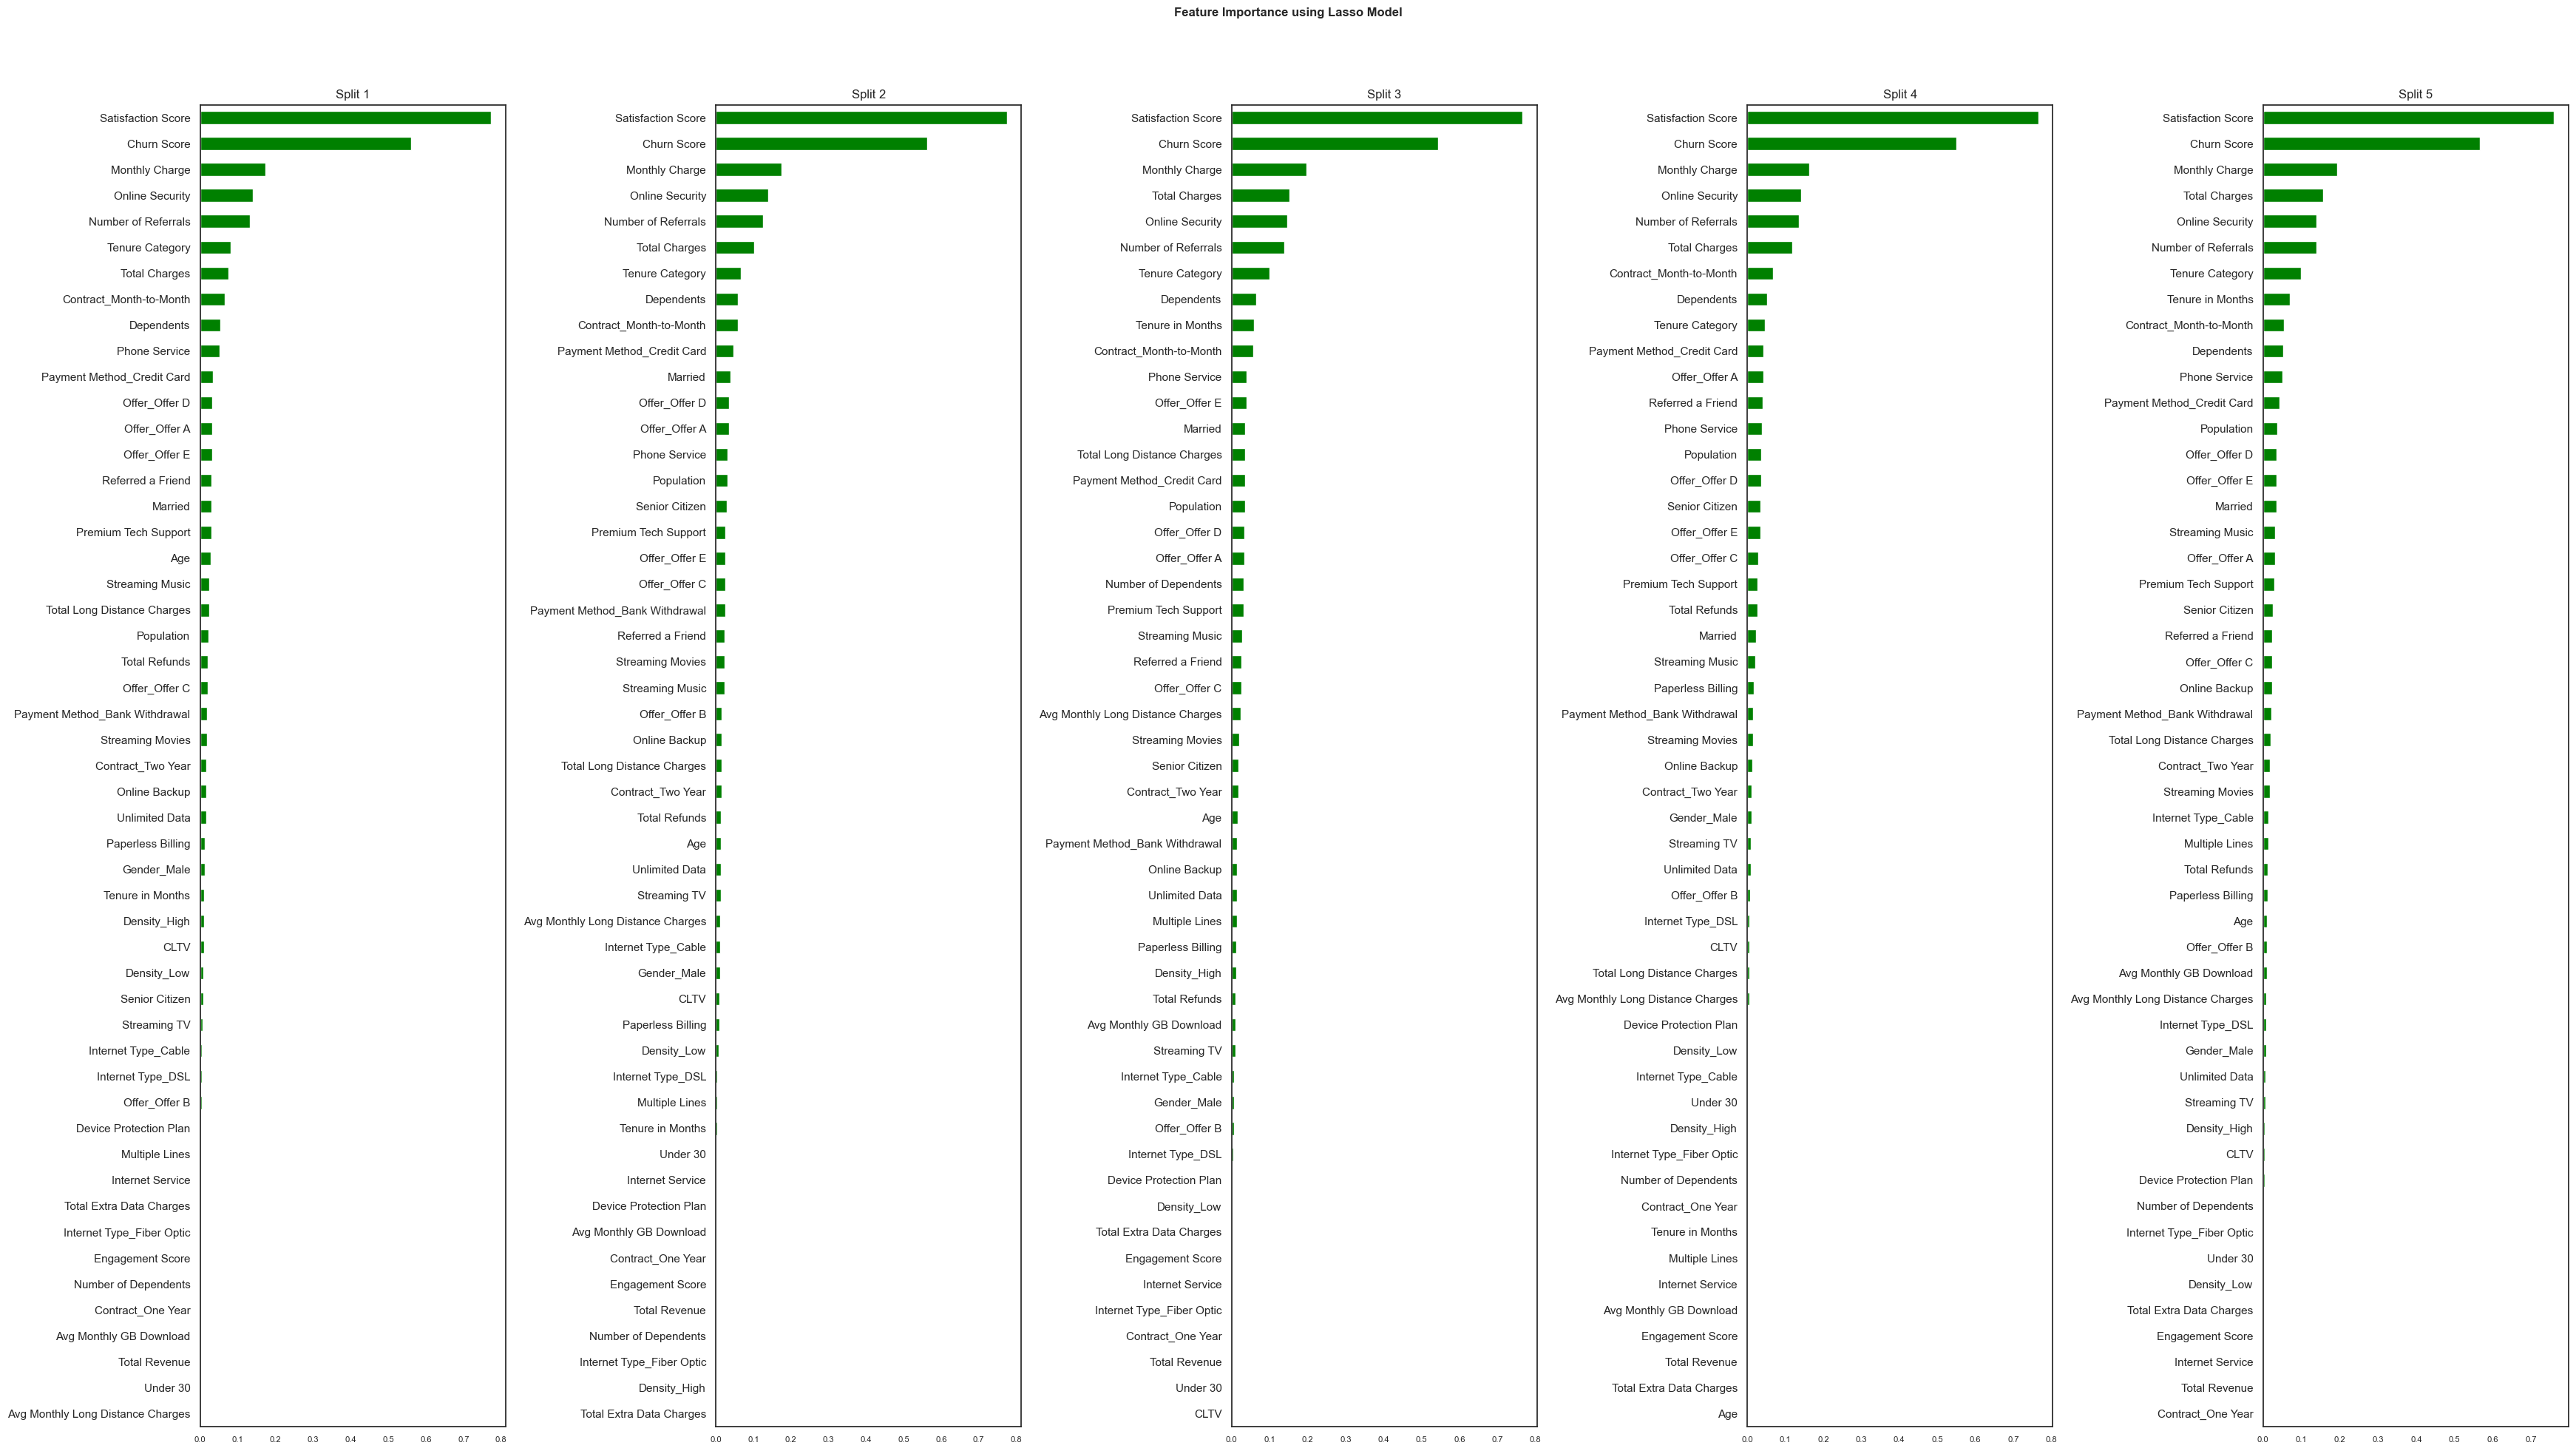

,Split 1,Split 2,Split 3,Split 4,Split 5,Lasso_Significant_Count,Embedded_Lasso
Age,0.028723,0.013209,0.017006,0.000000,0.009687,0,Remove
Under 30,0.000000,0.002429,0.000000,0.000000,0.000000,0,Remove
Senior Citizen,0.007750,0.028350,0.017616,0.035338,0.025503,0,Remove
Married,0.030009,0.039752,0.036206,0.023034,0.034759,0,Remove
Dependents,0.054193,0.059539,0.065016,0.051642,0.052100,0,Remove
Number of Dependents,0.000000,0.000000,0.032097,0.000000,0.001951,0,Remove
Referred a Friend,0.030511,0.023503,0.026058,0.039480,0.024083,0,Remove
Number of Referrals,0.133162,0.124724,0.138772,0.136181,0.138841,5,Keep
Tenure in Months,0.011252,0.002560,0.058116,0.000000,0.069947,0,Remove
Tenure Category,0.081384,0.065767,0.100682,0.047121,0.098298,1,Remove


In [103]:
def select_best_features_lasso(X, y, display_plot=True):
    count = 1
    fig = plt.figure(figsize=(35, 20))  # Create a figure to contain the subplots
    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    ranking_scores = pd.DataFrame(index=X.columns)  # Create a DataFrame to store the ranking scores

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Select numerical features for Lasso
        X_train_num = X_train.select_dtypes(include=[np.number])

        # Scale the numerical features
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = scaler.transform(X_train_num)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)

        # Apply Lasso to scaled numerical features
        feature_importances = apply_lasso(X_train_scaled, y_train, count, display_plot)

        # Store the feature importances in the ranking_scores DataFrame
        ranking_scores[f'Split {count}'] = feature_importances

        count += 1

    if display_plot:
        plt.suptitle("Feature Importance using Lasso Model", fontsize=12, fontweight='bold')  # Overall title above the subplots
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout of the subplots and overall title
        plt.show()

    # Create the lasso_results DataFrame
    lasso_results = ranking_scores.copy()

    # Determine 'Keep' or 'Remove' based on the significant count
    lasso_results['Lasso_Significant_Count'] = (lasso_results >= 0.1).sum(axis=1)
    lasso_results['Embedded_Lasso'] = np.where(lasso_results['Lasso_Significant_Count'] >= 3, 'Keep', 'Remove')

    return lasso_results
select_best_features_lasso(X, y, True)

__Notes:__ 

Using the Lasso Method and again the Random Forest we conclude the following features as being the most important to keep: 

> - __Lasso:(threshold higher than 0.1 coefficient)__ <p>
    >> - True in all 5 splits: MntVegan&Vegetarian, NumOfferPurchases, NumAppVisitsMonth, Total_Responses, Split_TakeAwayPurchases, Recency_sqrt<p>
> - __Random Forest: (threshold higher than 0.04)__ <p>
    >> - True in all 5 splits: MntVegan&Vegetarian, MntAdditionalRequests, NumAppVisitsMonth, Age, Total_Responses, Split_StorePurchases, Split_TakeAwayPurchases, Recency_sqrt<p>
    >> - True in 3 or 4 splits: Split_AppPurchases

In [104]:
def apply_rf(X_train, y_train, subplot_index):
    rf = RandomForestClassifier(criterion='entropy', random_state=99).fit(X_train, y_train)
    feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    return feature_importances

def select_best_features_rf(X, y):
    count = 1
    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    ranking_scores = pd.DataFrame(index=X.columns)  # Create a DataFrame to store the ranking scores

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Select numerical features for random forest
        X_train_num = X_train.select_dtypes(include=[np.number])

        # Scale the numerical features
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = scaler.transform(X_train_num)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)

        # Apply random forest to scaled numerical features
        feature_importances = apply_rf(X_train_scaled, y_train, count)

        # Store the feature importances in the ranking_scores DataFrame
        ranking_scores[f'Split {count}'] = feature_importances

        count += 1

    # Create the RF_results DataFrame
    RF_results = ranking_scores.copy()

    # Determine 'Keep' or 'Remove' based on the significant count
    RF_results['RF_Significant_Count'] = (RF_results >= 0.04).sum(axis=1)   # Threshold of 0.04 to count as significant
    RF_results['Embedded_RF'] = np.where(RF_results['RF_Significant_Count'] >= 3, 'Keep', 'Remove')

    return RF_results

RF_results = select_best_features_rf(X, y)
RF_results

,Split 1,Split 2,Split 3,Split 4,Split 5,RF_Significant_Count,Embedded_RF
Age,0.013842,0.015127,0.014261,0.014681,0.016154,0,Remove
Under 30,0.001240,0.001278,0.001293,0.001316,0.001183,0,Remove
Senior Citizen,0.005943,0.005642,0.004198,0.004266,0.006029,0,Remove
Married,0.002221,0.002228,0.002175,0.001808,0.002533,0,Remove
Dependents,0.012580,0.011215,0.010329,0.010174,0.011160,0,Remove
Number of Dependents,0.010609,0.009255,0.008729,0.008961,0.009179,0,Remove
Referred a Friend,0.002156,0.002666,0.002740,0.002280,0.001937,0,Remove
Number of Referrals,0.029326,0.024385,0.030421,0.029950,0.030427,0,Remove
Tenure in Months,0.022667,0.022803,0.020699,0.022530,0.020338,0,Remove
Tenure Category,0.017530,0.017797,0.018909,0.017309,0.018926,0,Remove


[BACK TO TOC](#toc)
    
<div class="alert alert-block alert-success">
<a id='decision'>
<font color = '#006400'> 
    
# 5. Feature Decision </font>
</a>
    
</div>

Merging all data and create 5 different scenarios

In [105]:
# Merge the results
merged_results = filtered.merge(rfe_results, on='Features', how='outer')

# Store Lasso results in lasso_results variable
lasso_results = select_best_features_lasso(X, y, False).reset_index()

# Merge Lasso results
merged_results = merged_results.merge(lasso_results[['index', 'Embedded_Lasso']], left_on='Features', right_on='index', how='outer').drop(columns=['index'])

# Store RF results in RF_results variable
RF_results = select_best_features_rf(X, y).reset_index()

# Merge RF results
merged_results = merged_results.merge(RF_results[['index', 'Embedded_RF']], left_on='Features', right_on='index', how='outer').drop(columns=['index'])

# Remove the unnecessary columns
merged_results = merged_results.drop(columns=['Kendall_Significant_Count',
                                              'ANOVA_Significant_Count',
                                              'CHI2_Significant_Count',
                                              'RFECV_Significant_Count',])

# Rename the columns for clarity
merged_results = merged_results.rename(columns={
    'Filter_Kendall': 'Filter_Kendall',
    'Filter_ANOVA': 'Filter_ANOVA',
    'Filter_CHI2': 'Filter_CHI2',
    'Wrapper_RFECV': 'Wrapper_RFECV',
    'Embedded_Lasso': 'Embedded_Lasso',
    'Embedded_RF': 'Embedded_RF'
})

# Set '-' for missing values
merged_results = merged_results.fillna('-')

# Modify values for rows where Features are 'Education' and 'Marital_Status'
merged_results.loc[merged_results['Features'].isin(['Education', 'Marital_Status']), 
                   merged_results.columns.difference(['Features', 'Filter_CHI2'])] = '-'

# Only keep the rows where Filter_CHI2 and Embedded_Lasso have valid values (not '-')
filtered_merged_results = merged_results.loc[(merged_results['Filter_CHI2'] != '-') | (merged_results['Embedded_Lasso'] != '-')]

# Display the filtered merged results dataframe
filtered_merged_results 


,Features,Filter_Kendall,Filter_ANOVA,Filter_CHI2,Wrapper_RFECV,Embedded_Lasso,Embedded_RF
0,Age,Discard,Keep,-,Remove,Remove,Remove
1,Under 30,Discard,Keep,-,Remove,Remove,Remove
2,Senior Citizen,Discard,Keep,-,Keep,Remove,Remove
3,Married,Discard,Keep,-,Keep,Remove,Remove
4,Dependents,Discard,Keep,-,Keep,Remove,Remove
5,Number of Dependents,Discard,Keep,-,Remove,Remove,Remove
6,Referred a Friend,Discard,Keep,-,Keep,Remove,Remove
7,Number of Referrals,Discard,Keep,-,Keep,Keep,Remove
8,Tenure in Months,Discard,Keep,-,Keep,Remove,Remove
9,Tenure Category,Discard,Keep,-,Keep,Remove,Remove


<Figure size 3500x2000 with 0 Axes>

__`Which variables should we keep using this techniques?`__ <p>
__Notes:__ 

> 1 - For categorical variables the choice is obvious, __Marital_Status__  will be kept and __Education__ dropped. <p>
> 2 - For numerical variables:
    >> - __# 1 Keep always__: Satisfaction Score, Churn Score, Contract_Month-to-Month, Number of Referrals	, Online Security , Monthly Charge<p>
    >> - __# 2 Keep almost always__ Satisfaction Score, Churn Score, Contract_Month-to-Month, Number of Referrals , Online Security	, Monthly Charge, Offer_Offer E, Offer_Offer A, Contract_Two Year<p>


In [108]:
scenario1_td = df[['Satisfaction Score', 'Churn Score', 'Contract_Month-to-Month', 'Number of Referrals' , 'Online Security' , 'Monthly Charge']].copy()

scenario2_td = df[['Satisfaction Score', 'Churn Score', 'Contract_Month-to-Month', 'Number of Referrals' , 'Online Security' , 'Monthly Charge', 'Offer_Offer E', 'Offer_Offer A', 'Contract_Two Year']].copy()



**Export to CSV**

In [109]:
scenario1_td.to_csv('scenario1.csv')
scenario2_td.to_csv('scenario2.csv')